# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

## 1) Is the distribution of body temperatures normal?
Normal distributions are characterized as being symmetrical, unimodal/bell-shaped, with roughly 68% of the observations falling within 1 standard deviation of the mean AND roughly 95% falling within 1.96 standard deviations of the mean.

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [39]:
sum(df.temperature > 100)

1

In [40]:
df[df.temperature > 100]

,temperature,gender,heart_rate
116,100.8,F,77.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [3]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

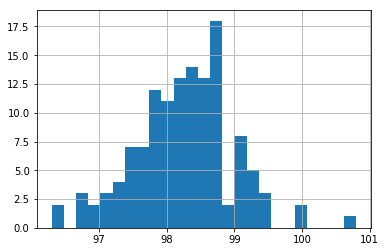

In [8]:
df.temperature.hist(bins=25)

First we investigate whether 68% of data is within one standard deviation - criteria1.

In [17]:
interval1 = df[df['temperature'] < np.mean(df.temperature) + np.std(df.temperature)]

In [19]:
interval1 = interval[interval['temperature'] < np.mean(df.temperature) + np.std(df.temperature)]

In [24]:
len(interval.temperature.values)

111

In [28]:
criteria1 = 111/130
criteria1

0.8538461538461538

Criteria1 is fullfilled. Analogically, we investigate criteria2 - roughly 95% of data is within 1.96 standard devation.

In [43]:
interval2 = df[df['temperature'] < np.mean(df.temperature) + np.std(df.temperature)*1.96]

In [45]:
interval2 = interval2[interval2['temperature'] < np.mean(df.temperature) + np.std(df.temperature)*1.96]

In [48]:
len(interval2.temperature.values)

127

In [49]:
criteria2 = 127/130
criteria2

0.9769230769230769

Criteria2 is fullfilled. 
Conclusion: we can use assumption, that our data are normaly distributed.

## 2) Is the sample size large? Are the observations independent?

The criteria is, that sample size > 30. In our case, this is true (sample size = 130, 65 observations for women and 65 for men). Observations are indepednet? Well, we do not know how the data was collected, but we assume that it was done independently.

In [53]:
df_women[df['gender'] == 'F']
df_women.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 2 to 128
Data columns (total 3 columns):
temperature    65 non-null float64
gender         65 non-null object
heart_rate     65 non-null float64
dtypes: float64(2), object(1)
memory usage: 2.0+ KB


C:\Users\milen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


## 3) Is the true population mean really 98.6 degrees F?
* First, try a bootstrap hypothesis test.
* Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
* In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?
* Now try using the other test. How is the result be different? Why?

H_0 - true population mena =  is 98.6 F  
H_A - true population mena !=  is 98.6 F

In [59]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


*ztest()* -- calculates the z score of each value in the sample, relative to the sample mean and standard deviation.  
*stats.ttest_1samp()* -- calculates the T-test for the mean of ONE group of scores.  
This is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.  
  
We choose significance level  $\alpha = 0.01$

In [62]:
from statsmodels.stats.weightstats import ztest
import scipy.stats as stats

print("z test result:", ztest(df.temperature,value=98.6))
print("t test result:", stats.ttest_1samp(df.temperature,98.6))

z test result: (-5.4548232923645195, 4.9021570141012155e-08)
t test result: Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


A one-sample test was used since one set of data was compared to a single value. For this situation, it was best to use a t-statistic since the population standard deviation is unknown. Though a t-test is best for small samples, it becomes similar to the z-test with large samples, so the results did not differ much using a z-statistic, which was estimated using the standard error of the mean.  
The p-value is markedly less than the chosen significance level of 0.01, so the null hypothesis that the true population mean is equal to the conventional mean (98.6°F) was rejected.

## 4) Draw a small sample of size 10 from the data and repeat both frequentist tests.
* Which one is the correct one to use?
* What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?

In [67]:
np.random.seed(42)
df_sample = df.sample(10, random_state=42)
df_sample.describe()

,temperature,heart_rate
count,10.000000,10.000000
mean,98.220000,70.600000
std,0.769993,7.545418
min,96.700000,61.000000
25%,97.850000,64.750000
50%,98.200000,70.000000
75%,98.750000,77.000000
max,99.400000,82.000000


In [68]:
from statsmodels.stats.weightstats import ztest
import scipy.stats as stats

print("z test result:", ztest(df_sample.temperature,value=98.6))
print("t test result:", stats.ttest_1samp(df_sample.temperature,98.6))

z test result: (-1.5606191828511504, 0.11861362990253162)
t test result: Ttest_1sampResult(statistic=-1.5606191828511504, pvalue=0.15304624869561917)


In this case we are unable reject null hypothesis. However, we have rather small sample size, to get reliable results, the sample size should be at least 30 (as this was one of the condition for normal distribution).

## 5) At what temperature should we consider someone's temperature to be "abnormal"?
* As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.  
* Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [78]:
temp = df.temperature
# Calculating the Margin of error
zscore = 1.96 # 95% Confidence level
n = 130
mu = np.mean(df.temperature)
sig = np.std(df.temperature)/np.sqrt(n)

margin = abs(zscore*sig)
conf_inter = [mu + margin, mu - margin]
print("The real mean population temperature: %0.2F F +/- %0.2F F" % (mu,margin))
print("Interval of normal human body temperature is: %0.2F F and %0.2F F" % (conf_inter[1],conf_inter[0]))

The real mean population temperature: 98.25 F +/- 0.13 F
Interval of normal human body temperature is: 98.12 F and 98.37 F


## 6) Is there a significant difference between males and females in normal temperature?
* What testing approach did you use and why?
* Write a story with your conclusion in the context of the original problem.

In [79]:
df_women = df[df['gender'] == 'F']
df_women.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.393846,74.153846
std,0.743488,8.105227
min,96.400000,57.000000
25%,98.000000,68.000000
50%,98.400000,76.000000
75%,98.800000,80.000000
max,100.800000,89.000000


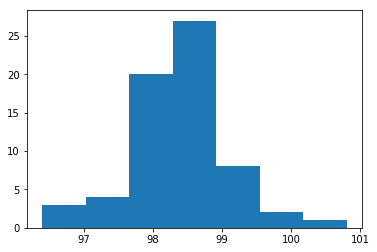

In [81]:
df_women['temperature'].hist(grid=False, bins=7)

In [82]:
df_men = df[df['gender'] == 'M']
df_men.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.104615,73.369231
std,0.698756,5.875184
min,96.300000,58.000000
25%,97.600000,70.000000
50%,98.100000,73.000000
75%,98.600000,78.000000
max,99.500000,86.000000


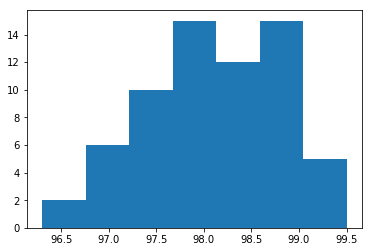

In [83]:
df_men['temperature'].hist(grid=False, bins=7)

According just mean values, we would assume that women tends to have slightly higher temperatures tham men. However, we need to look whether this difference is signifcant.

In [85]:
stats.ttest_ind(df_men.temperature, df_women.temperature)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)

The p-value is rather small, $p = 2.4\%$ and therefore we conclude that the difference is not significant.